In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
bike_train = pd.read_csv('train.csv')

In [ ]:
bike_train = bike_train.set_index('date_time')
bike_train

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...
2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568


In [ ]:
bike_test = pd.read_csv('test.csv')

In [ ]:
bike_test = bike_test.set_index('date_time')
bike_test

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,116640
2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,110607
2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,14026
2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,94160
2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,110533
...,...,...,...,...,...,...,...,...,...
2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,105813
2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,92869
2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,106378


In [ ]:
bike = pd.concat([bike_train,bike_test])
bike

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...
2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,105813
2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,92869
2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,106378


In [ ]:
# 1. "일교차가 너무 큰 날씨"를 알기 위한 정보
bike['temp_diff_info'] = bike['high_temp'] - bike['low_temp']
# 2. "덥고 습한 날씨"를 알기 위한 정보
bike['sweat_info'] = bike['high_temp'] * bike['humidity'] 
# 3. "춥고 바람부는 날씨"를 알기 위한 정보
bike['cold_info'] = bike['low_temp'] * bike['wind_speed'] 

In [ ]:
bike

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,temp_diff_info,sweat_info,cold_info
date_time,,,,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,8.400,1575.000000,38.430000
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,6.188,1326.827000,41.997736
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,5.004,1146.846764,27.739280
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,4.056,888.628432,26.083056
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,4.546,768.903064,18.717750
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,105813,8.267,2132.793612,21.652592
2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,92869,8.188,2036.844000,26.847480
2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,106378,7.789,2024.960682,35.532000


In [ ]:
bike.drop(['wind_direction', 'humidity', 'cold_info'], axis=1, inplace=True)

In [ ]:
bike = bike[['sky_condition', 'precipitation_form', 'wind_speed', 'low_temp', 'high_temp', 'Precipitation_Probability', 'temp_diff_info', 'sweat_info', 'number_of_rentals']]

In [ ]:
bike

,sky_condition,precipitation_form,wind_speed,low_temp,high_temp,Precipitation_Probability,temp_diff_info,sweat_info,number_of_rentals
date_time,,,,,,,,,
2018-04-01,4.000,0.000,3.050,12.600,21.000,30.000,8.400,1575.000000,22994
2018-04-02,2.950,0.000,3.278,12.812,19.000,19.500,6.188,1326.827000,28139
2018-04-03,2.911,0.000,2.690,10.312,15.316,19.113,5.004,1146.846764,26817
2018-04-04,3.692,0.425,3.138,8.312,12.368,43.493,4.056,888.628432,26034
2018-04-05,4.000,0.723,3.186,5.875,10.421,63.378,4.546,768.903064,2833
...,...,...,...,...,...,...,...,...,...
2021-06-26,3.980,0.223,1.066,20.312,28.579,36.486,8.267,2132.793612,105813
2021-06-27,2.777,0.135,1.290,20.812,29.000,18.378,8.188,2036.844000,92869
2021-06-28,3.338,1.270,1.692,21.000,28.789,35.946,7.789,2024.960682,106378


In [ ]:
bike = bike.values[0:].astype(np.float)

In [ ]:
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7)

In [ ]:
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [ ]:
#pip install tensorflow==1.14

     |████████████████████████████████| 109.3 MB 48 kB/s 
     |████████████████████████████████| 3.1 MB 56.3 MB/s 
     |████████████████████████████████| 488 kB 59.2 MB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you

In [ ]:
#import tensorflow.compat.v1 as tf 
#tf.disable_v2_behavior()


In [ ]:
# 하이퍼파라미터
tf.set_random_seed(777)
input_data_column_cnt = 9  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 7            # 1개 시퀀스의 길이(시계열데이터 입력 개수) 일주일 단위
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 200          # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [ ]:
sky = bike[:,0:1]
norm_sky = min_max_scaling(sky) # 하늘상태 데이터 정규화 처리
precipitation = bike[:,1:2]
norm_precipitation = min_max_scaling(precipitation) # 강수형태 데이터 정규화 처리
wind_speed = bike[:,2:3]
norm_wind_speed = min_max_scaling(wind_speed) # 풍속 데이터 정규화 처리
low_temp = bike[:,3:4]
norm_low_temp = min_max_scaling(low_temp) # 최저기온 데이터 정규화 처리
high_temp = bike[:,4:5]
norm_high_temp = min_max_scaling(high_temp) # 최고기온 데이터 정규화 처리
precipitaion_prob = bike[:,5:6]
norm_precipitaion_prob = min_max_scaling(precipitaion_prob) # 강수확률 데이터 정규화 처리
temp_diff = bike[:,6:7]
norm_temp_diff = min_max_scaling(temp_diff) # 일교차 데이터 정규화 처리
sweat = bike[:,7:8]
norm_sweat = min_max_scaling(sweat) # 덥고 습한 데이터 정규화 처리
rental = bike[:,8:9]
norm_rental = min_max_scaling(rental) # 따릉이 대여량 데이터 정규화 처리

In [ ]:
x = np.concatenate((norm_sky,norm_precipitation,norm_wind_speed, norm_low_temp,norm_high_temp,norm_precipitaion_prob,norm_temp_diff,norm_sweat, norm_rental), axis=1) # axis=1, 세로로 합친다
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("="*100) # 화면상 구분용
 
y = x[:, [-1]] # 타켓은 대여량이다
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값

x.shape:  (364, 9)
x[0]:  [0.99999997 0.         0.47321795 0.52331403 0.47203094 0.3651323
 0.47470705 0.61763829 0.15702302]
x[-1]:  [0.75666664 0.46433286 0.08796868 0.96014528 0.86355521 0.35361846
 0.50433457 0.98073358 0.86648359]
y[0]:  [0.15702302]
y[-1]:  [0.86648359]


In [ ]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용
 
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 대여량(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

[[0.99999997 0.         0.47321795 0.52331403 0.47203094 0.3651323
  0.47470705 0.61763829 0.15702302]
 [0.64999998 0.         0.52018952 0.53371944 0.38701862 0.23733599
  0.26398018 0.48834718 0.19381691]
 [0.63699998 0.         0.39905232 0.41101404 0.23042591 0.23262579
  0.15118605 0.39458258 0.18436278]
 [0.8973333  0.28071332 0.49134733 0.31284971 0.10511774 0.52935664
  0.06087454 0.26005814 0.17876324]
 [0.99999997 0.4775429  0.50123608 0.19323648 0.02235824 0.7713785
  0.10755454 0.19768461 0.01284389]
 [0.82199997 0.23645969 0.61413266 0.02758418 0.         0.4876707
  0.37896542 0.15221108 0.08767601]
 [0.30399999 0.         0.83868972 0.         0.04471648 0.11102456
  0.53272363 0.05683172 0.08618137]] -> [0.04806448]


In [ ]:
len(dataY)

357

In [ ]:
# 학습용/테스트용 데이터 생성
train_size = 265
test_size = 91
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])
 
 
# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)
 
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

X:  Tensor("Placeholder:0", shape=(?, 7, 9), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [ ]:
# 모델(LSTM 네트워크) 생성
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell
 
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [ ]:
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 7, 20), dtype=float32)


In [ ]:
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러일의 대여량을 이용해서 다음날의 대여량 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

In [ ]:
# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [ ]:
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
 
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과

In [ ]:
import datetime
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)

        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)

학습을 시작합니다...
epoch: 100, train_error(A): 0.0932353138923645, test_error(B): 0.19646859169006348, B-A: 0.10323327779769897
epoch: 200, train_error(A): 0.07869745045900345, test_error(B): 0.18830807507038116, B-A: 0.10961062461137772
elapsed_time: 0:00:00.963525
elapsed_time per epoch: 0:00:00.004818


In [ ]:
# 하이퍼파라미터 출력
print('input_data_column_cnt:', input_data_column_cnt, end='')
print(',output_data_column_cnt:', output_data_column_cnt, end='')
 
print(',seq_length:', seq_length, end='')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='')
print(',forget_bias:', forget_bias, end='')
print(',num_stacked_layers:', num_stacked_layers, end='')
print(',keep_prob:', keep_prob, end='')
 
print(',epoch_num:', epoch_num, end='')
print(',learning_rate:', learning_rate, end='')
 
print(',train_error:', train_error_summary[-1], end='')
print(',test_error:', test_error_summary[-1], end='')
print(',min_test_error:', np.min(test_error_summary))

input_data_column_cnt: 9,output_data_column_cnt: 1,seq_length: 7,rnn_cell_hidden_dim: 20,forget_bias: 1.0,num_stacked_layers: 1,keep_prob: 1.0,epoch_num: 200,learning_rate: 0.01,train_error: 0.07869745,test_error: 0.18830808,min_test_error: 0.18830808


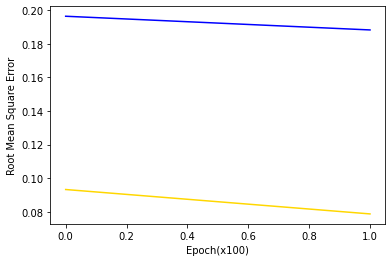

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

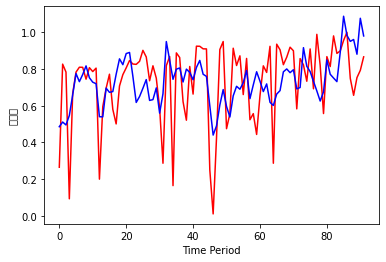

In [ ]:
# 결과 그래프 출력
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('대여량')
plt.show()

In [ ]:

# test데이터의 대여량을 예측해본다
test_predict = sess.run(hypothesis, feed_dict={X: testX})


In [ ]:
testY

array([[0.26495176],
       [0.82672188],
       [0.78357755],
       [0.09288938],
       [0.66595868],
       [0.78304835],
       [0.80993042],
       [0.80932255],
       [0.74484564],
       [0.80765628],
       [0.78624502],
       [0.80492445],
       [0.19991704],
       [0.59453062],
       [0.69503622],
       [0.77179922],
       [0.5802636 ],
       [0.50091895],
       [0.70775139],
       [0.76921042],
       [0.80630466],
       [0.84631668],
       [0.82730829],
       [0.82554905],
       [0.84197579],
       [0.90189011],
       [0.86569694],
       [0.73603513],
       [0.81771113],
       [0.75023063],
       [0.58732917],
       [0.28667053],
       [0.81851208],
       [0.86786381],
       [0.16471076],
       [0.88803072],
       [0.86262184],
       [0.62259982],
       [0.52115738],
       [0.81392804],
       [0.6634843 ],
       [0.92450995],
       [0.92401651],
       [0.91009275],
       [0.90967082],
       [0.25062038],
       [0.0105626 ],
       [0.422

In [ ]:
test_predict

array([[0.48573688],
       [0.5112884 ],
       [0.49536264],
       [0.5467641 ],
       [0.65863603],
       [0.77537507],
       [0.7313004 ],
       [0.7701817 ],
       [0.8171165 ],
       [0.75267273],
       [0.7283862 ],
       [0.7200563 ],
       [0.54021645],
       [0.5393741 ],
       [0.6959557 ],
       [0.6730397 ],
       [0.6771594 ],
       [0.771477  ],
       [0.85546017],
       [0.82373554],
       [0.88437057],
       [0.8903764 ],
       [0.7603181 ],
       [0.61799854],
       [0.6502498 ],
       [0.69516975],
       [0.7425074 ],
       [0.62898105],
       [0.6333504 ],
       [0.69728327],
       [0.55979955],
       [0.6654272 ],
       [0.9497011 ],
       [0.8478307 ],
       [0.7440673 ],
       [0.7993126 ],
       [0.805792  ],
       [0.72940856],
       [0.7994672 ],
       [0.7819329 ],
       [0.7416132 ],
       [0.8085183 ],
       [0.8469959 ],
       [0.77172935],
       [0.7598854 ],
       [0.59981376],
       [0.44018894],
       [0.490

In [ ]:
NMAE(testY, test_predict)

0.755927002894315

In [ ]:
print("test_predict", test_predict)
test_predict = reverse_min_max_scaling(rental,test_predict) # 대여량데이터를 역정규화한다
print("test_number_of_rental", test_predict) # 예측한 대여량을 출력한다

In [ ]:
test_set = bike_test['number_of_rentals'].values
test_set=list(test_set)
test_set

[116640,
 110607,
 14026,
 94160,
 110533,
 114292,
 114207,
 105191,
 113974,
 110980,
 113592,
 28992,
 84172,
 98226,
 108960,
 82177,
 71082,
 100004,
 108598,
 113785,
 119380,
 116722,
 116476,
 118773,
 127151,
 122090,
 103959,
 115380,
 105944,
 83165,
 41123,
 115492,
 122393,
 24069,
 125213,
 121660,
 88097,
 73912,
 114851,
 93814,
 130314,
 130245,
 128298,
 128239,
 36082,
 2514,
 60065,
 127759,
 133864,
 67451,
 78809,
 128763,
 115588,
 122961,
 93453,
 120987,
 74271,
 78928,
 63064,
 92536,
 115335,
 110305,
 130227,
 41123,
 131838,
 127568,
 116208,
 121944,
 129558,
 126823,
 82549,
 120869,
 116059,
 103603,
 128217,
 97851,
 139346,
 115752,
 78992,
 122359,
 114793,
 138150,
 124808,
 126714,
 134714,
 140870,
 105813,
 92869,
 106378,
 111907,
 122200]